In [1]:
import subprocess
import time

def run_once(parser, *, iter_num=100000000, expr='2+2*x'):
    start_time = time.monotonic()
    subprocess.run(['./main', '-p', parser, '-n', str(iter_num), '-x', '4', expr])
    end_time = time.monotonic()
    return (end_time - start_time) / iter_num

def gen_expr(size):
    return '*'.join('(x+{:.1F})'.format(1.2 * i) for i in range(1,size+1))

SIZE_RANGE = list(range(1, 102, 5))

In [2]:
for expr_len in SIZE_RANGE:
    print(gen_expr(expr_len))

(x+1.2)
(x+1.2)*(x+2.4)*(x+3.6)*(x+4.8)*(x+6.0)*(x+7.2)
(x+1.2)*(x+2.4)*(x+3.6)*(x+4.8)*(x+6.0)*(x+7.2)*(x+8.4)*(x+9.6)*(x+10.8)*(x+12.0)*(x+13.2)
(x+1.2)*(x+2.4)*(x+3.6)*(x+4.8)*(x+6.0)*(x+7.2)*(x+8.4)*(x+9.6)*(x+10.8)*(x+12.0)*(x+13.2)*(x+14.4)*(x+15.6)*(x+16.8)*(x+18.0)*(x+19.2)
(x+1.2)*(x+2.4)*(x+3.6)*(x+4.8)*(x+6.0)*(x+7.2)*(x+8.4)*(x+9.6)*(x+10.8)*(x+12.0)*(x+13.2)*(x+14.4)*(x+15.6)*(x+16.8)*(x+18.0)*(x+19.2)*(x+20.4)*(x+21.6)*(x+22.8)*(x+24.0)*(x+25.2)
(x+1.2)*(x+2.4)*(x+3.6)*(x+4.8)*(x+6.0)*(x+7.2)*(x+8.4)*(x+9.6)*(x+10.8)*(x+12.0)*(x+13.2)*(x+14.4)*(x+15.6)*(x+16.8)*(x+18.0)*(x+19.2)*(x+20.4)*(x+21.6)*(x+22.8)*(x+24.0)*(x+25.2)*(x+26.4)*(x+27.6)*(x+28.8)*(x+30.0)*(x+31.2)
(x+1.2)*(x+2.4)*(x+3.6)*(x+4.8)*(x+6.0)*(x+7.2)*(x+8.4)*(x+9.6)*(x+10.8)*(x+12.0)*(x+13.2)*(x+14.4)*(x+15.6)*(x+16.8)*(x+18.0)*(x+19.2)*(x+20.4)*(x+21.6)*(x+22.8)*(x+24.0)*(x+25.2)*(x+26.4)*(x+27.6)*(x+28.8)*(x+30.0)*(x+31.2)*(x+32.4)*(x+33.6)*(x+34.8)*(x+36.0)*(x+37.2)
(x+1.2)*(x+2.4)*(x+3.6)*(x+4.8)*(x+6.0)

In [3]:
dp = {}
for parser in ['libjit', 'gccjit', 'llvm', 'dl']:
    dp[parser] = d = []
    for expr_len in SIZE_RANGE:
        d.append({'time': run_once(parser, expr=gen_expr(expr_len)), 'expr_len': expr_len})

In [4]:
import pandas
df = pandas.concat({parser: pandas.io.json.json_normalize(d) for parser, d in dp.items()})
df.reset_index(level=0, inplace=True)
df.rename(columns={'level_0': 'parser'}, inplace=True)
df.to_csv('data.csv')

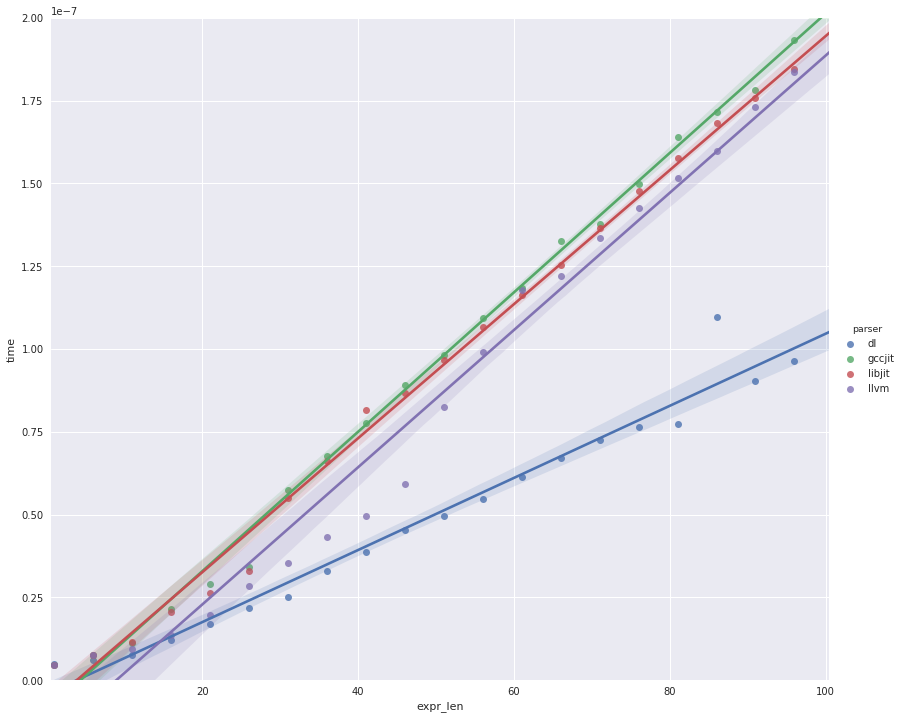

In [5]:
import seaborn
from matplotlib import pyplot
import numpy

seaborn.lmplot(x='expr_len', y='time', hue="parser", data=df, truncate=True, size=10, aspect=1.2)
pyplot.xlim(0.5, 100.5)
pyplot.ylim(1e-10, 2e-7)
pyplot.grid(True)
#pyplot.yscale("log")
    
pyplot.show()